## 경제 뉴스가 금 가격에 미치는 영향
시장 변화 해독: 금 가격과 경제 뉴스 통찰력 (2019-2023)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
import warnings
warnings.filterwarnings('ignore')
golden_palette = ["#FFD700", "#DAA520", "#B8860B", "#CD853F", "#FFAC33", "#FFD700", "#EEDD82", "#FFDB58", "#D4AF37", "#FFC125"]

In [3]:
path = '/Users/leejieun/kaggle-notebooks/datasets/fekihmea/the-effect-of-economic-news-on-gold-prices/'

news = pd.read_csv(path+ 'economic_calendar_19_24.csv')
gold_price = pd.read_csv(path +'gold_price_19_24.csv')
# /Users/leejieun/kaggle-notebooks/datasets/fekihmea/the-effect-of-economic-news-on-gold-prices
#/Users/leejieun/kaggle-notebooks/datasets/fekihmea/the-effect-of-economic-news-on-gold-prices/economic_calendar_19_24.csv

In [4]:
gold_price.head()

,Date,Price,Open,High,Low,Vol_K,Change_percent
0,12/01/2023,2089.7,2056.5,2095.7,2052.6,241.62,1.58
1,11/30/2023,2057.2,2065.4,2067.4,2051.2,151.92,-0.48
2,11/29/2023,2067.1,2062.0,2072.7,2055.9,197.79,0.81
3,11/28/2023,2050.5,2025.0,2054.4,2022.9,1.86,1.35
4,11/27/2023,2023.1,2012.9,2027.5,2012.7,1.06,0.47


In [12]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def summary(df):
    missing_info = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    data_types= pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary_df = pd.concat([missing_info, data_types], axis=1)
    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            num_unique_choices = df[column].unique()
            summary_df.loc[column, 'Unique Choices'] = num_unique_choices
        if pd.api.types.is_numeric_dtype(df[column]):
            low_limit, up_limit = outlier_thresholds(df, column)
            summary_df.loc[column, 'min'] = df[column].min()
            summary_df.loc[column, 'max'] = df[column].max()
            summary_df.loc[column, 'Mean'] = df[column].mean()
            summary_df.loc[column, 'Median'] = df[column].median()
            summary_df.loc[column, 'Variance'] = df[column].var()
            summary_df.loc[column, 'deviation'] = df[column].std()
            num_outliers = len(df[(df[column]< low_limit) | (df[column]> up_limit)])
            summary_df.loc[column, 'Num Outliers'] = num_outliers
            return summary_df


In [13]:
summary(gold_price)

,Missing Values,Data Type,Unique Choices,min,max,Mean,Median,Variance,deviation,Num Outliers
Date,0,object,"[12/01/2023, 11/30/2023, 11/29/2023, 11/28/202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0,float64,NaN,1272.0,2089.7,1743.149062,1797.7,42242.879221,205.530726,0.0
Open,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vol_K,15,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change_percent,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
gold_price.index = pd.to_datetime(gold_price['Date'])
gold_price.set_index(gold_price.index, inplace=True)
gold_price.drop(columns=['Date'], inplace=True)

In [16]:
summary(gold_price)

,Missing Values,Data Type,min,max,Mean,Median,Variance,deviation,Num Outliers
Price,0,float64,1272.0,2089.7,1743.149062,1797.7,42242.879221,205.530726,0.0
Open,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vol_K,15,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change_percent,0,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN


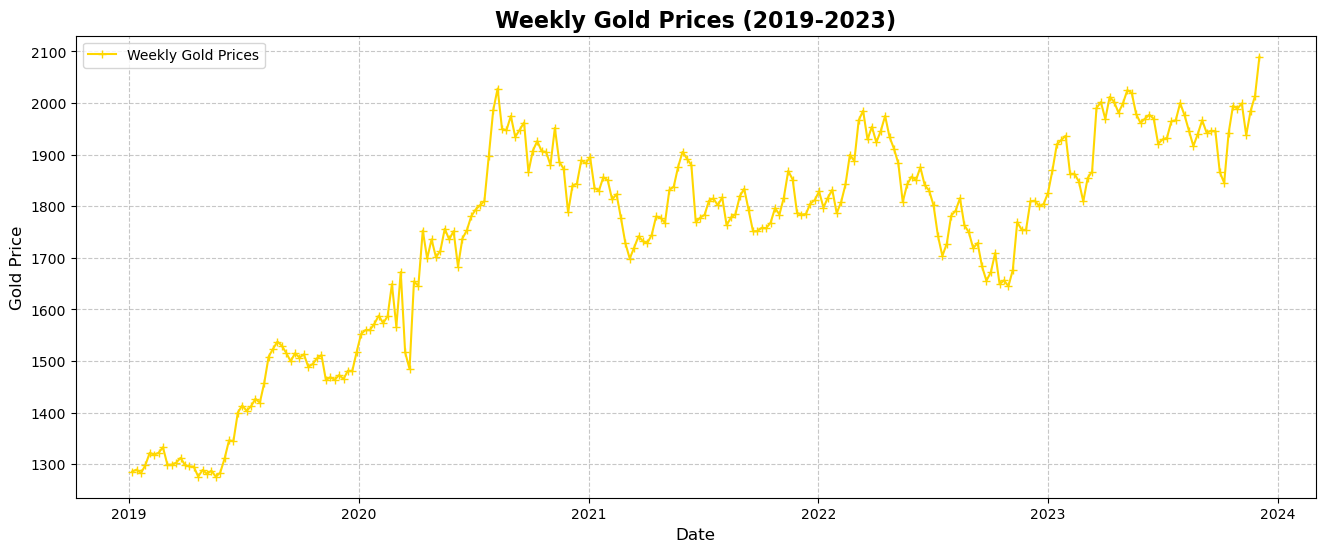

In [20]:
weekly_gold_prices = gold_price.resample('W').last()
plt.figure(figsize=(16,6))
plt.plot(weekly_gold_prices.index, weekly_gold_prices['Price'], label='Weekly Gold Prices', color = '#ffd700', marker='+')

plt.title('Weekly Gold Prices (2019-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()

In [21]:
news.head(20)

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast
0,Tuesday,01/01/19,20:45,CN,Caixin Manufacturing PMI DEC,49.7,50.2,50.1,50.1
1,Friday,01/04/19,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K
2,Sunday,01/06/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
3,Monday,01/07/19,10:00,CA,Ivey PMI s.a DEC,59.7,57.2,56.8,56.7
4,Monday,01/07/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
5,Tuesday,01/08/19,0:00,JP,Consumer Confidence DEC,42.7,42.9,NaN,42
6,Tuesday,01/08/19,5:00,EA,Business Confidence DEC,0.82,1.04,0.99,1.1
7,Tuesday,01/08/19,8:30,CA,Balance of Trade NOV,-2.06B,-0.85B,-1.95B,NaN
8,Wednesday,01/09/19,20:30,CN,Inflation Rate YoY DEC,0.019,2.20%,0.021,0.022
9,Friday,01/11/19,4:30,GB,Balance of Trade NOV,-2.904B,-3.037B,NaN,-2.2B


In [26]:
print(news.shape)
#summary(news)

(1876, 9)
